In [0]:
import pandas as pd
from keras.layers import Bidirectional, GlobalMaxPool1D, MaxPooling1D, Add, Flatten

In [0]:
!pip install -U -q PyDrive

In [4]:
from google.colab import files
uploaded = files.upload()

Saving currency_daily_BTC_CNY (1).csv to currency_daily_BTC_CNY (1) (1).csv


In [5]:
data=pd.read_csv("currency_daily_BTC_CNY (1).csv")
data.head()

,timestamp,open (CNY),high (CNY),low (CNY),close (CNY),open (USD),high (USD),low (USD),close (USD),volume,market cap (USD)
0,2019-04-03,36579.606459,37337.266173,33347.115040,34209.630322,5440.654230,5563.343392,4970.949063,5097.242100,124.847322,6.363770e+05
1,2019-04-02,31113.943447,36587.158280,31098.460777,36587.158280,4635.946148,5441.777448,4633.639246,5441.777448,5451.446216,2.966556e+07
2,2019-04-01,30791.863008,31248.864005,30772.364322,31156.717159,4587.515547,4656.017929,4584.615159,4642.319388,4955.242631,2.300382e+07
3,2019-03-31,30690.550021,30791.526483,30656.396422,30791.526483,4572.489601,4587.465409,4567.401163,4587.465409,5319.489809,2.440298e+07
4,2019-03-30,30719.061815,30816.158697,30628.164930,30690.302659,4576.737485,4591.203647,4563.195041,4572.452748,6683.322670,3.055918e+07


In [0]:
df_data = pd.DataFrame(data, columns = ['timestamp','open (USD)', 'high (USD)',
                                            'low (USD)', 'close (USD)','volume'])

In [36]:

train_data=df_data[df_data.iloc[:,0]<'2018-01-01']
train_data=train_data.iloc[::-1]
train_data

,timestamp,open (USD),high (USD),low (USD),close (USD),volume
1828,2014-04-01,453.427610,470.555968,453.427610,461.291035,5628.021147
1827,2014-04-02,462.040758,479.549854,412.794639,413.373127,10525.594058
1826,2014-04-03,413.708292,431.963432,390.367443,427.277406,10340.816260
1825,2014-04-04,427.619393,443.057454,416.402600,434.897325,7436.238665
1824,2014-04-05,435.229041,453.639887,433.029637,453.639887,4306.278920
1823,2014-04-06,454.793619,463.091501,448.497672,456.916941,2989.022883
1822,2014-04-07,456.909800,457.205736,442.439890,442.439890,2459.677864
1821,2014-04-08,442.251162,458.015130,439.975615,446.408216,2690.792538
1820,2014-04-09,447.442126,450.723601,437.832610,439.049445,2684.598329
1819,2014-04-10,438.919044,440.943196,371.272280,374.371752,9165.370857


In [39]:
train_data.shape

(1371, 6)

In [41]:
test_data=df_data[df_data.iloc[:,0]>='2018-01-01']
test_data=test_data.iloc[::-1]
test_data

,timestamp,open (USD),high (USD),low (USD),close (USD),volume
457,2018-01-01,13897.860153,13900.412448,13142.529558,13512.425139,0.189480
456,2018-01-02,13512.425139,15017.280049,13401.054068,14729.885629,0.125810
455,2018-01-03,14729.885629,15159.653779,14682.472485,14823.642983,0.198600
454,2018-01-04,14823.642983,15105.634227,14376.662100,14618.087339,0.154260
453,2018-01-05,14618.087339,16324.421055,14608.490096,16324.421055,0.156280
452,2018-01-06,16324.421055,16924.930396,15553.208978,16287.514245,0.127553
451,2018-01-07,16287.514245,17542.149523,16287.514245,17377.399762,4.908762
450,2018-01-08,17377.399762,17409.407700,14424.687699,14971.887824,0.188423
449,2018-01-09,14971.887824,15310.537078,14214.626782,14214.626782,0.132650
448,2018-01-10,14214.626782,14511.840151,13678.207975,14511.840151,0.216350


In [40]:
test_data.shape

(458, 6)

In [42]:
  train_coin_price = train_data.iloc[:, 1:2].values
  train_coin_price

array([[  453.42760964],
       [  462.04075834],
       [  413.7082918 ],
       ...,
       [13621.86984878],
       [14398.62562892],
       [12956.81469629]])

In [0]:
import numpy as np
train_coin_price=np.flipud(train_coin_price) 


In [44]:
real_coin_price = test_data.iloc[:, 1:2].values
real_coin_price

array([[13897.86015322],
       [13512.4251392 ],
       [14729.88562879],
       [14823.64298315],
       [14618.08733859],
       [16324.42105474],
       [16287.51424529],
       [17377.39976214],
       [14971.88782446],
       [14214.62678211],
       [14511.8401512 ],
       [13739.56006518],
       [13706.4256735 ],
       [14171.39782147],
       [13341.65037719],
       [14243.63551113],
       [14177.41720088],
       [11697.19396615],
       [11781.84063887],
       [11790.50139854],
       [14307.71834904],
       [11775.8566193 ],
       [12052.26203872],
       [11797.27729555],
       [12633.57983272],
       [12104.96671139],
       [12111.44345702],
       [12337.34979456],
       [12337.34979456],
       [12337.34979456],
       [12337.34979456],
       [12094.23064384],
       [12084.04538124],
       [ 9411.71444663],
       [ 9410.44542794],
       [ 9410.44542794],
       [ 9410.44542794],
       [ 9174.50463453],
       [ 9198.87649377],
       [ 9198.87649377],


In [0]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
train_coin_price_scaled = sc.fit_transform(train_coin_price)

In [47]:
train_coin_price_scaled

array([[0.5912453 ],
       [0.65793   ],
       [0.62200454],
       ...,
       [0.01111838],
       [0.01335379],
       [0.01295543]])

In [0]:
import numpy as np
X_train = []
y_train = []
for i in range(60, 1371):
    X_train.append(train_coin_price_scaled[i-60:i, 0])
    y_train.append(train_coin_price_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [49]:
X_train

array([[0.5912453 , 0.65793   , 0.62200454, ..., 0.34316125, 0.3309378 ,
        0.2976715 ],
       [0.65793   , 0.62200454, 0.68426596, ..., 0.3309378 , 0.2976715 ,
        0.27365088],
       [0.62200454, 0.68426596, 0.71528205, ..., 0.2976715 , 0.27365088,
        0.25489028],
       ...,
       [0.02165005, 0.02108385, 0.02024515, ..., 0.0130186 , 0.01211373,
        0.01176178],
       [0.02108385, 0.02024515, 0.01823611, ..., 0.01211373, 0.01176178,
        0.01111838],
       [0.02024515, 0.01823611, 0.01843739, ..., 0.01176178, 0.01111838,
        0.01335379]])

In [50]:
X_train.shape

(1311, 60)

In [0]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [52]:
X_train.shape

(1311, 60, 1)

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM,GRU
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.recurrent import LSTM, GRU
from keras.layers import Convolution1D, MaxPooling1D, AtrousConvolution1D, RepeatVector
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, CSVLogger
from keras.layers.wrappers import Bidirectional
from keras import regularizers
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import *
from keras.optimizers import RMSprop, Adam, SGD, Nadam
from keras.initializers import *
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Conv1D, GRU, CuDNNGRU, CuDNNLSTM, BatchNormalization
from keras.layers import Bidirectional, GlobalMaxPool1D, MaxPooling1D, Add, Flatten
from keras.layers import GlobalAveragePooling1D, GlobalMaxPooling1D, concatenate, SpatialDropout1D

In [0]:
regressor3 = Sequential()

In [61]:
regressor3.add(Convolution1D(input_shape = (60, 1),
nb_filter=16,
filter_length=60,
border_mode="same"))
regressor3.add(LeakyReLU())
regressor3.add(Dropout(0.1))

regressor3.add(Convolution1D(nb_filter=16,
filter_length=8,
border_mode="same"))
regressor3.add(LeakyReLU())
regressor3.add(Dropout(0.1))

regressor3.add(Convolution1D(nb_filter=8,
filter_length=4,
border_mode="same"))
regressor3.add(LeakyReLU())
regressor3.add(Dropout(0.1))



regressor3.add(MaxPooling1D(pool_size=2))

regressor3.add(GRU(150,return_sequences=True))
regressor3.add(Dropout(0.1))

regressor3.add(GRU(150))
regressor3.add(LeakyReLU())
regressor3.add(Dropout(0.1))




 
regressor3.add(Dense(128))
regressor3.add(LeakyReLU())
regressor3.add(Dropout(0.2))

regressor3.add(Dense(64))
regressor3.add(LeakyReLU())
regressor3.add(Dropout(0.2))
 

regressor3.add(Dense(64))
regressor3.add(LeakyReLU())
regressor3.add(Dropout(0.2))



regressor3.add(Dense(1))
regressor3.add(Activation('tanh'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(input_shape=(60, 1), filters=16, kernel_size=60, padding="same")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(filters=16, kernel_size=8, padding="same")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(filters=8, kernel_size=4, padding="same")`
  app.launch_new_instance()


In [0]:

regressor3.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [63]:
regressor3.fit(X_train, y_train, epochs = 100, batch_size = 50)

Epoch 1/100
1311/1311 [==============================] - 6s 5ms/step - loss: 8.2017e-04
Epoch 2/100
1311/1311 [==============================] - 4s 3ms/step - loss: 3.8564e-04
Epoch 3/100
1311/1311 [==============================] - 4s 3ms/step - loss: 3.9318e-04
Epoch 4/100
1311/1311 [==============================] - 4s 3ms/step - loss: 3.0180e-04
Epoch 5/100
1311/1311 [==============================] - 4s 3ms/step - loss: 2.4168e-04
Epoch 6/100
1311/1311 [==============================] - 4s 3ms/step - loss: 2.2351e-04
Epoch 7/100
1311/1311 [==============================] - 4s 3ms/step - loss: 2.5431e-04
Epoch 8/100
1311/1311 [==============================] - 4s 3ms/step - loss: 2.1899e-04
Epoch 9/100
1311/1311 [==============================] - 4s 3ms/step - loss: 2.4905e-04
Epoch 10/100
1311/1311 [==============================] - 4s 3ms/step - loss: 2.2534e-04
Epoch 11/100
1311/1311 [==============================] - 4s 3ms/step - loss: 2.2907e-04
Epoch 12/100
1311/1311 [======

In [0]:
import pandas as pd
total_open = pd.concat((train_data['open (USD)'], test_data['open (USD)']), axis = 0)

In [65]:
test_coin_price = total_open[len(total_open) - len(test_data) - 60:].values
test_coin_price = test_coin_price.reshape(-1,1)
test_coin_price

array([[ 6609.36340602],
       [ 7328.6245621 ],
       [ 7592.91145563],
       [ 7530.99137769],
       [ 7548.64854665],
       [ 7536.63061909],
       [ 7157.32723606],
       [ 7636.33185031],
       [ 7460.9082131 ],
       [ 7536.88973207],
       [ 7531.37737625],
       [ 6653.64116222],
       [ 7454.96132429],
       [ 7534.83003683],
       [ 7539.54119814],
       [ 7597.51926528],
       [ 7961.18007597],
       [ 7745.1215004 ],
       [ 8027.54705078],
       [ 8237.08666164],
       [ 8026.08413397],
       [ 8171.45364319],
       [ 8131.21900277],
       [ 8181.13164214],
       [ 8684.448537  ],
       [ 9286.07347547],
       [ 9398.17053874],
       [ 9876.41011471],
       [10667.52834789],
       [10593.32140853],
       [10775.14472524],
       [10776.73567369],
       [11495.18533776],
       [11266.85196484],
       [10444.80068975],
       [13481.50337356],
       [17274.36562166],
       [19214.73274937],
       [18049.19986058],
       [15832.24070476],


In [0]:

test_coin_price = sc.transform(test_coin_price)
X_test = []
for i in range(60, 500):
    X_test.append(test_coin_price[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_coin_price = regressor3.predict(X_test)
predicted_coin_price = sc.inverse_transform(predicted_coin_price)

In [67]:
XTest=np.reshape(X_test[0],(1,60,1))
X_test.shape

(440, 60, 1)

In [0]:
predicted=[]
for i in range(30):

  p=sc.inverse_transform(regressor3.predict(XTest))
  predicted.append(sc.inverse_transform(regressor3.predict(XTest)))
  XTest=np.reshape(XTest,(60))
  XTest=np.delete(XTest,0)
  XTest=np.append(XTest,sc.transform(p))
  XTest=np.reshape(XTest,(1,60,1))

In [69]:
predicted_coin_price

array([[8967.932 ],
       [8987.242 ],
       [8881.525 ],
       [8817.127 ],
       [8819.397 ],
       [8741.753 ],
       [8763.538 ],
       [8890.349 ],
       [9193.884 ],
       [9262.543 ],
       [9218.451 ],
       [9117.376 ],
       [8928.355 ],
       [8731.727 ],
       [8536.009 ],
       [8309.574 ],
       [8311.9795],
       [8494.913 ],
       [8514.7705],
       [8567.478 ],
       [8593.605 ],
       [8839.624 ],
       [8779.23  ],
       [8659.059 ],
       [8535.498 ],
       [8481.428 ],
       [8435.871 ],
       [8386.623 ],
       [8385.119 ],
       [8404.161 ],
       [8397.3125],
       [8347.366 ],
       [8214.039 ],
       [8046.064 ],
       [7611.8955],
       [7232.84  ],
       [6960.42  ],
       [6807.9707],
       [6752.8096],
       [6806.766 ],
       [6822.1064],
       [6722.1187],
       [6710.189 ],
       [6709.4814],
       [6729.98  ],
       [6720.932 ],
       [6794.849 ],
       [6988.0405],
       [7188.3057],
       [7369.974 ],


# RESULT

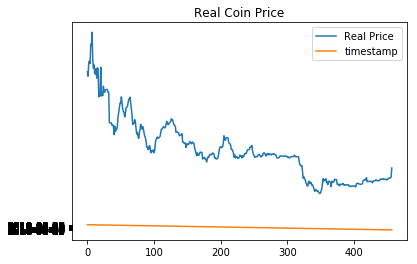

In [74]:
plt.plot(real_coin_price, label = 'Real Price')
plt.plot(test_data['timestamp'])
plt.title('Real Coin Price')
plt.legend()

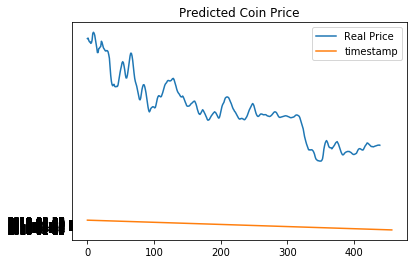

In [75]:
plt.plot(predicted_coin_price, label = 'Real Price')
plt.plot(test_data['timestamp'])
plt.title('Predicted Coin Price')
plt.legend()

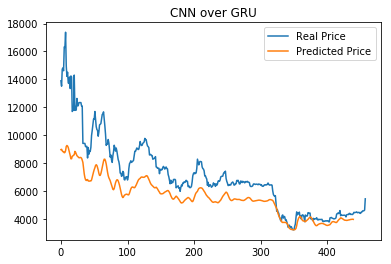

In [72]:
plt.plot(real_coin_price,label = 'Real Price')
plt.plot(predicted_coin_price,label = 'Predicted Price')
plt.title('CNN over GRU')
plt.legend()

In [0]:
def classifcation(df):
    list_y =[]
    temp = df
    for i in range(len(temp)-1):
        if temp[i+1] > temp[i]:
            y = 1
        else:
            y = -1
            
        list_y.append(y)
    ydf = pd.DataFrame(list_y)
    return ydf

In [0]:
real_coin_price_2 = classifcation(real_coin_price[0:440])
predicted_coin_price_2 =classifcation(predicted_coin_price)

In [86]:
from sklearn.metrics import accuracy_score
score = accuracy_score(real_coin_price_2, predicted_coin_price_2)
print('Accuracy for CNN over GRU  Model',score)

Accuracy for CNN over GRU  Model 0.49658314350797267


In [85]:
from sklearn.metrics import f1_score
f1_score(real_coin_price_2, predicted_coin_price_2)

0.47754137115839246